# 线性回归
线性回归预测模型：$$ y = h_\theta(x) = \theta^T · x $$
- $ \theta $ 表示模型的参数向量包括偏执项 $ \theta_0$ 和特征权重值 $ \theta_1 $ 到 $ \theta_n $
- $\theta^T$表示向量$\theta$的转置（行向量变为了列向量）
- x为每个样本中特征值得向量形式，包括$ x_1 $到$x_n$，而且$x_0$恒为1
- $ \theta^T·x $表示$ \theta^T $和x的点积
- $ h_0 $表示参数为0的假设函数

评定指标：
- 均方根误差（rmse）。
- 线性回归模型的MSE损失函数
$$ MSE(X,h_0) = \frac{1}{m}\sum_{i=1}^{m} (\theta^T · x^{(i)} - y^{(i)} )^2 $$

正态方程


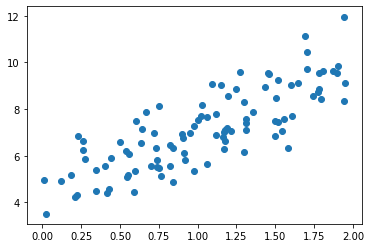

In [3]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

%matplotlib inline
plt.scatter(X, y)
plt.show()

### 计算矩阵的逆，使用dot计算矩阵的乘法。

In [4]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

### 线性回归预测

In [5]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.3716818]), array([[2.65458981]]))

In [8]:
X_new = np.array([[0],[2]])
lin_reg.predict(X_new)

array([[4.3716818 ],
       [9.68086142]])

# 梯度下降
梯度下降的整体思路是通过迭代来逐渐调整参数使得损失函数达到最小值。
超参数学习率的值决定了步长的大小。如果学习率太小，必须经过多次迭代，算法才能收敛，这是比较耗时的。
如果学习率太大，将跳过最低点，到达山谷另一面。这可能使的算法是发散的，函数变得越来越大，永远不可能找到一个好答案。

线性回归模型的均方误差损失函数是一个**凸函数**。意味着：
- 曲线上的任意两点，它们连线段不会与曲线发生交叉。
- 损失函数没有局部最小值，仅仅是全局最小值。
- 它也是一个斜率不能突变的连续函数。
- 导致梯度下降可以无限接近全局最小值。

有无特征缩放的梯度下降
- 当使用梯度下降时候，应该确保所有的特征有着相近的尺度范围（使用Scikit Learn的**StandardScaler**），否则将需要很长时间才能收敛。
- 训练模型意味着找到一组模型参数，可以在训练集上使得损失函数最小。
- 对于模型参数空间的搜索，模型的参数越多，参数空间的维数越多，找到合适参数越困难。

## 批量梯度下降
- 每一次训练过程都会使用所有训练数据。因此，在大数据集上，其会变得很慢。
- 然而，梯度下降的运算规模和特征的数量成正比。训练一个数千数量特征的线性回归模型使用梯度下降要比正太方程快的多。


In [10]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradients
theta

array([[4.3716818 ],
       [2.65458981]])

## 随机梯度下降
- 每次操作使用非常少的数据，使得算法变得非常快。
- 每次迭代，只需在内存中有一个实例，使得随机梯度算法可以在大规模训练集上使用。
- 由于它的随机性，与批量梯度下降相比，呈现出更多不规律性。
- 到达最小值不是平缓的下降，损失函数忽高忽低，只是大体上呈下降趋势。
- 它不会停止在一个值上，会一直在这个值附近摆动。
- 停止时，最后参数还不错，但不是最优。
- 当损失函数不规则时，随机梯度下降算法能够跳过局部最小值。因此，随机梯度下降在寻找全局最小值上比批量梯度下降表现的好。

通过逐渐降低学习率，来解决不能达到最小值的问题。
- 开始时，走的每一步较大，然后变得越来越小，从而使算法到达全局最优解。

In [15]:
n_epochs = 50
t0, t1 = 5, 50 #learning_schedule超参数

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi, dot(theta)-yi)
        eta = learning_schedule(epoch * m + 1)
        theta = theta - eta * gradients